In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''



Given a training dataset comprising $ N $ observations $ \{ x_n \} $, where $ n = 1, \ldots, N $, together with corresponding target values $ \{ t_n \} $, the goal is to predict the value of $ t $ for a new input $ x $.

## Predictive Distribution

In the simplest approach, this prediction can be achieved by directly constructing an appropriate function $ y(x) $ whose values for new inputs $ x $ represent the predictions for the corresponding values of $ t $. More generally, from a probabilistic perspective, we aim to model the predictive distribution $ p(t|x) $, as it expresses our uncertainty about the value of $ t $ for each $ x $. Using this conditional distribution, we can make predictions of $ t $ for any new value of $ x $ in a way that minimizes the expected value of a chosen loss function.

A common choice of loss function for real-valued variables is the **squared loss**, for which the optimal solution is given by the conditional expectation of $ t $.

## Linear Models for Regression

Although linear models have certain limitations for high-dimensional input spaces in pattern recognition, they have favorable analytical properties and serve as the foundation for more advanced models. The simplest linear model for regression involves a linear combination of input variables:

$$
y(x, w) = w_0 + w_1 x_1 + \ldots + w_D x_D
$$

where $ x = (x_1, \ldots, x_D)^T $. This is commonly known as **linear regression**.

### Linear Basis Function Models

To extend the flexibility of linear regression, we consider linear combinations of fixed, nonlinear functions of the input variables, yielding the model:

$$
y(x, w) = w_0 + \sum_{j=1}^{M-1} w_j \phi_j(x)
$$

where $ \phi_j(x) $ are known as **basis functions**. Denoting the maximum index by $ M - 1 $, the model has $ M $ parameters. The parameter $ w_0 $ serves as an offset in the data and is often called a **bias parameter**.

For convenience, we define a dummy basis function $ \phi_0(x) = 1 $ so that:

$$
y(x, w) = \sum_{j=0}^{M-1} w_j \phi_j(x) = w^T \phi(x)
$$

where $ w = (w_0, \ldots, w_{M-1})^T $ and $ \phi = (\phi_0, \ldots, \phi_{M-1})^T $.

By using **nonlinear basis functions**, we allow $ y(x, w) $ to be nonlinear in the input vector $ x $, but the model remains linear in the parameters $ w $, simplifying the analysis.

### Examples of Basis Functions

The example of polynomial regression illustrates a linear model where there is a single input variable $ x $ and the basis functions are powers of $ x $:

$$
\phi_j(x) = x^j
$$

Polynomial basis functions are **global** functions, meaning changes in one region affect all regions. Localized basis functions, such as **Gaussian** functions, are an alternative:

$$
\phi_j(x) = \exp \left( - \frac{(x - \mu_j)^2}{2s^2} \right)
$$

where $ \mu_j $ governs the location and $ s $ controls the spatial scale. Another option is the **sigmoidal basis function**:

$$
\phi_j(x) = \sigma \left( \frac{x - \mu_j}{s} \right)
$$

where 

$$
\sigma(a) = \frac{1}{1 + \exp(-a)}
$$ 

is the **logistic sigmoid** function.

### Fourier and Wavelet Basis Functions

Fourier basis functions expand the model using sinusoidal functions, each representing a specific frequency. Wavelets, by contrast, are basis functions localized in both space and frequency, making them suitable for input values that lie on a regular lattice, such as time series or images.

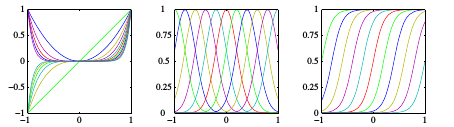

Fig.1 Examples of basis functions, showing polynomials on the left, Gaussians of the form (3.4) in the centre, and sigmoidal of the form (3.5) on the right.

## Linear Basis Function Models

## Notation

Most of the discussion in this section is independent of the specific choice of basis functions. For simplicity, we often assume a single target variable $ t $, although the model can be extended to multiple target variables as needed.


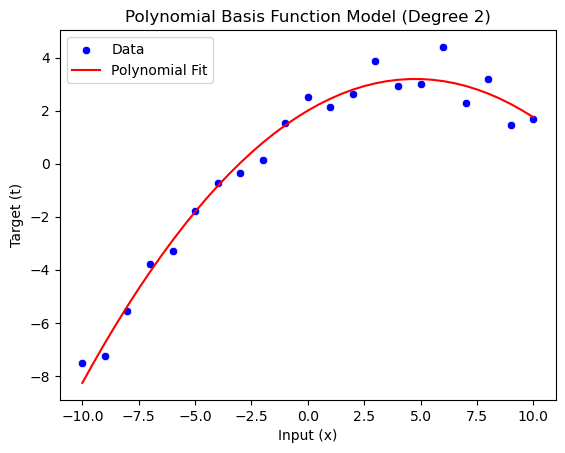

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Define the polynomial basis function model for regression
class PolynomialBasisFunctionModel:
    def __init__(self, degree):
        self.degree = degree  # Degree of polynomial basis functions
        self.weights = None   # Placeholder for the model's weights

    def basis_functions(self, x):
        # Compute polynomial basis functions for an input x
        return [x**i for i in range(self.degree + 1)]

    def fit(self, X, t):
        # Fit the model to the training data X with target values t
        Phi = [self.basis_functions(x) for x in X]  # Design matrix using basis functions
        Phi_T = list(zip(*Phi))  # Transpose of the design matrix
        Phi_T_Phi = [[sum(a * b for a, b in zip(Phi_col, Phi_row)) for Phi_row in Phi_T] for Phi_col in Phi_T]
        Phi_T_t = [sum(a * b for a, b in zip(Phi_row, t)) for Phi_row in Phi_T]
        
        # Solve linear system to find weights: Phi_T_Phi * weights = Phi_T_t
        self.weights = self.solve(Phi_T_Phi, Phi_T_t)
    
    def predict(self, X):
        # Predict values for new input X using learned weights
        return [sum(w * b for w, b in zip(self.weights, self.basis_functions(x))) for x in X]

    def solve(self, A, b):
        # Solve the linear system A * x = b using Gaussian elimination
        n = len(b)
        for i in range(n):
            # Scale to make A[i][i] == 1
            factor = A[i][i]
            for j in range(i, n):
                A[i][j] /= factor
            b[i] /= factor
            
            # Eliminate entries in other rows
            for k in range(n):
                if k != i:
                    factor = A[k][i]
                    for j in range(i, n):
                        A[k][j] -= factor * A[i][j]
                    b[k] -= factor * b[i]
        return b

# Generate some sample data (for demonstration)
import random
random.seed(0)
X = [i for i in range(-10, 11)]
t = [2 + 0.5*x - 0.05*x**2 + random.gauss(0, 0.5) for x in X]

# Instantiate and fit the polynomial model
degree = 2
model = PolynomialBasisFunctionModel(degree)
model.fit(X, t)

# Predict and plot results
X_new = [x/2 for x in range(-20, 21)]
predictions = model.predict(X_new)

# Plotting the original data and the polynomial fit
sns.scatterplot(x=X, y=t, color="blue", label="Data")
sns.lineplot(x=X_new, y=predictions, color="red", label="Polynomial Fit")
plt.xlabel("Input (x)")
plt.ylabel("Target (t)")
plt.title(f"Polynomial Basis Function Model (Degree {degree})")
plt.legend()
plt.show()


### 1 Maximum Likelihood and Least Squares

In Chapter 1, we fitted polynomial functions to datasets by minimizing a sum-of-squares error function. We also showed that this error function could be motivated as the maximum likelihood solution under an assumed Gaussian noise model. Let us return to this discussion and consider the least squares approach, and its relation to maximum likelihood, in more detail.

As before, we assume that the target variable $ t $ is given by a deterministic function $ y(x, w) $ with additive Gaussian noise, so that

$$
t = y(x, w) + \epsilon
$$

where $ \epsilon $ is a zero-mean Gaussian random variable with precision (inverse variance) $ \beta $. Thus, we can write the likelihood function as

$$
p(t|x, w, \beta) = \mathcal{N} (t|y(x, w), \beta^{-1})
$$

Recall that, if we assume a squared loss function, the optimal prediction for a new value of $ x $ will be given by the conditional mean of the target variable. In the case of a Gaussian conditional distribution of the form above, the conditional mean is simply

$$
\mathbb{E}[t|x] = \int t p(t|x) \, dt = y(x, w)
$$

Note that the Gaussian noise assumption implies that the conditional distribution of $ t $ given $ x $ is unimodal, which may be inappropriate for some applications. An extension to mixtures of conditional Gaussian distributions, which permit multimodal conditional distributions, will be discussed in Section 14.5.1.

Now, consider a dataset of inputs $ X = \{ x_1, \dots, x_N \} $ with corresponding target values $ t_1, \dots, t_N $. We group the target variables $ \{ t_n \} $ into a column vector denoted by $t $, where the typeface is chosen to distinguish it from a single observation of a multivariate target, which would be denoted as $ t $.

Assuming that these data points are drawn independently from the distribution $ p(t|x, w, \beta) $, we obtain the following expression for the likelihood function, which is a function of the adjustable parameters $ w $ and $ \beta $:

$$
p(t|X, w, \beta) = \prod_{n=1}^N \mathcal{N}(t_n | w^T \phi(x_n), \beta^{-1})
$$

Taking the logarithm of the likelihood function and using the standard form for the univariate Gaussian, we have

$$
\ln p(t|w, \beta) = \sum_{n=1}^N \ln \mathcal{N}(t_n | w^T \phi(x_n), \beta^{-1})
$$

which expands to

$$
\ln p(t|w, \beta) = N \ln \beta - \frac{N}{2} \ln(2\pi) - \frac{\beta}{2} E_D(w)
$$

where the sum-of-squares error function is defined by

$$
E_D(w) = \sum_{n=1}^N \frac{1}{2} (t_n - w^T \phi(x_n))^2
$$

Now, we can use maximum likelihood to determine $ w $ and $ \beta $. First, consider the maximization with respect to $ w $. As observed earlier, maximization of the likelihood function under a conditional Gaussian noise distribution for a linear model is equivalent to minimizing the sum-of-squares error function $ E_D(w) $.

The gradient of the log-likelihood function is

$$
\nabla \ln p(t|w, \beta) = \sum_{n=1}^N (t_n - w^T \phi(x_n)) \phi(x_n)^T
$$

Setting this gradient to zero gives

$$
\sum_{n=1}^N t_n \phi(x_n) - w^T \sum_{n=1}^N \phi(x_n) \phi(x_n)^T = 0
$$

Solving for $ w $, we obtain the normal equations for the least squares problem:

$$
w_{ML} = (\Phi^T \Phi)^{-1} \Phi^T t
$$

where $ \Phi $ is the design matrix, whose elements are given by

$$
\Phi_{nj} = \phi_j(x_n)
$$

Thus, the design matrix is

$$
\Phi = \begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1) & \dots & \phi_{M-1}(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & \dots & \phi_{M-1}(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(x_N) & \phi_1(x_N) & \dots & \phi_{M-1}(x_N)
\end{pmatrix}
$$

The quantity $ \Phi^{\dagger} \equiv (\Phi^T \Phi)^{-1} \Phi^T $ is known as the Moore-Penrose pseudo-inverse of the matrix $ \Phi $, and it generalizes the inverse of a matrix to non-square matrices.

We can also maximize the log-likelihood function with respect to the noise precision parameter $ \beta $, giving

$$
\beta_{ML} = \frac{1}{N} \sum_{n=1}^N (t_n - w_{ML}^T \phi(x_n))^2
$$

This shows that the inverse of the noise precision is given by the residual variance of the target values around the regression function.

### Geometrical Interpretation of the Least-Squares Solution

The least-squares solution can be viewed geometrically as the orthogonal projection of the data vector $ t $ onto the subspace spanned by the basis functions $ \phi_j(x) $, where each basis function $ \phi_j(x) $ is viewed as a vector $ \phi_j $ of length $ N $, with elements $ \phi_j(x_n) $.


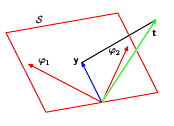

Fig.2 Geometrical interpretation of the least-squares solution, in an N -dimensional space whose axes are the values of $ t_1, t_2, \dots, t_N $. The least-squares regression function is obtained by ﬁnding the orthogonal projection of the data vector t onto the subspace spanned by the basis functions $ \phi_j(x) $ in which each basis function is viewed as a vec- tor $\phi_j$ of length N with elements $\phi_j(x_n) $.

### Geometrical Interpretation of the Least-Squares Solution

The least-squares solution can be interpreted geometrically in an $ N $-dimensional space, where the axes represent the values of $ t_1, t_2, \dots, t_N $. The least-squares regression function is obtained by finding the orthogonal projection of the data vector $ t $ onto the subspace spanned by the basis functions $ \phi_j(x) $, where each basis function is viewed as a vector $ \phi_j $ of length $ N $ with elements $ \phi_j(x_n) $.

In this interpretation, the regression function minimizes the error between the actual target values and the predictions, with the error measured as the perpendicular distance from the data points to the regression function, making the solution the closest approximation in terms of the least-squares criterion.

In mathematical terms, the projection of the data vector $ t $ onto the subspace spanned by the vectors $ \phi_j(x_n) $ is expressed as:

$$
t_{LS} = \Phi \cdot w_{ML}
$$

where $ \Phi $ is the design matrix and $ w_{ML} $ is the maximum likelihood estimate of the weights, which corresponds to the least-squares solution.


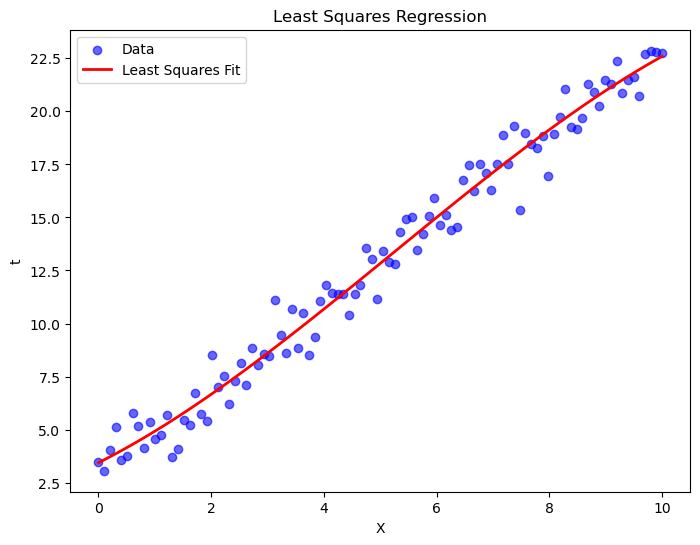

Maximum Likelihood Weights (w_ML):
[ 3.44298017  1.33130621  0.16039426 -0.01020427]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (for illustration purposes)
np.random.seed(42)
N = 100  # Number of data points
X = np.linspace(0, 10, N)  # Input data (e.g., a single feature)
t = 2 * X + 3 + np.random.normal(0, 1, N)  # Linear target with Gaussian noise

# Define the basis functions (polynomials in this case)
def basis_functions(X, degree=3):
    """Generate polynomial basis functions for each input X."""
    return np.vstack([X**i for i in range(degree + 1)]).T

# Create the design matrix Φ, where each row corresponds to the basis function values for one data point
degree = 3  # Degree of the polynomial
Phi = basis_functions(X, degree)

# Compute the maximum likelihood weights (w_ML) using the normal equation
# w_ML = (Φ^T Φ)^(-1) Φ^T t
Phi_T = Phi.T
w_ML = np.linalg.inv(Phi_T @ Phi) @ Phi_T @ t

# Compute the predicted values (regression function)
t_pred = Phi @ w_ML

# Plot the data and the regression function
plt.figure(figsize=(8, 6))
plt.scatter(X, t, color='blue', label='Data', alpha=0.6)
plt.plot(X, t_pred, color='red', label='Least Squares Fit', linewidth=2)
plt.xlabel('X')
plt.ylabel('t')
plt.title('Least Squares Regression')
plt.legend()
plt.show()

# Display the weights (coefficients)
print("Maximum Likelihood Weights (w_ML):")
print(w_ML)


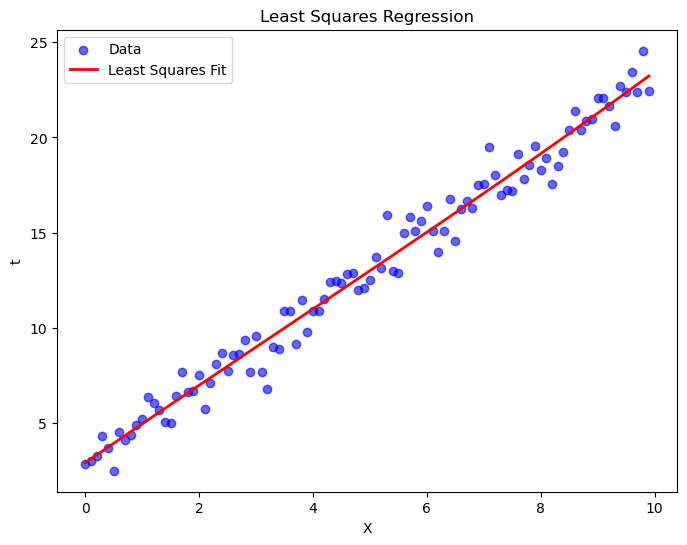

Maximum Likelihood Weights (w_ML):
[2.9119950019602356, 2.065744706375426, -0.01793547345042157, 0.0016721160151877967]


In [3]:
import matplotlib.pyplot as plt

# Generate synthetic data (for illustration purposes)
import random
random.seed(42)
N = 100  # Number of data points
X = [i * 0.1 for i in range(N)]  # Input data (e.g., a single feature)
t = [2 * x + 3 + random.gauss(0, 1) for x in X]  # Linear target with Gaussian noise

# Define the basis functions (polynomials in this case)
def basis_functions(X, degree=3):
    """Generate polynomial basis functions for each input X."""
    return [[x**i for i in range(degree + 1)] for x in X]

# Create the design matrix Φ, where each row corresponds to the basis function values for one data point
degree = 3  # Degree of the polynomial
Phi = basis_functions(X, degree)

# Compute the maximum likelihood weights (w_ML) using the normal equation
# w_ML = (Φ^T Φ)^(-1) Φ^T t

# Compute the transpose of Φ
Phi_T = [[Phi[j][i] for j in range(N)] for i in range(degree + 1)]

# Compute Φ^T Φ
Phi_T_Phi = [[sum(Phi_T[i][k] * Phi[k][j] for k in range(N)) for j in range(degree + 1)] for i in range(degree + 1)]

# Compute Φ^T t
Phi_T_t = [sum(Phi_T[i][j] * t[j] for j in range(N)) for i in range(degree + 1)]

# Function to compute the inverse of a matrix using Gaussian elimination
def inverse_matrix(matrix):
    size = len(matrix)
    augmented_matrix = [row + [1 if i == j else 0 for j in range(size)] for i, row in enumerate(matrix)]
    
    for i in range(size):
        pivot = augmented_matrix[i][i]
        for j in range(i, 2 * size):
            augmented_matrix[i][j] /= pivot
        
        for j in range(i + 1, size):
            factor = augmented_matrix[j][i]
            for k in range(i, 2 * size):
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    for i in range(size - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            factor = augmented_matrix[j][i]
            for k in range(2 * size):
                augmented_matrix[j][k] -= factor * augmented_matrix[i][k]
    
    return [row[size:] for row in augmented_matrix]

# Compute the inverse of Φ^T Φ
Phi_T_Phi_inv = inverse_matrix(Phi_T_Phi)

# Compute the maximum likelihood weights w_ML
w_ML = [sum(Phi_T_Phi_inv[i][j] * Phi_T_t[j] for j in range(degree + 1)) for i in range(degree + 1)]

# Compute the predicted values (regression function)
t_pred = [sum(w_ML[i] * x**i for i in range(degree + 1)) for x in X]

# Plot the data and the regression function
plt.figure(figsize=(8, 6))
plt.scatter(X, t, color='blue', label='Data', alpha=0.6)
plt.plot(X, t_pred, color='red', label='Least Squares Fit', linewidth=2)
plt.xlabel('X')
plt.ylabel('t')
plt.title('Least Squares Regression')
plt.legend()
plt.show()

# Display the weights (coefficients)
print("Maximum Likelihood Weights (w_ML):")
print(w_ML)


###  Geometry of Least Squares

At this point, it is instructive to consider the geometrical interpretation of the least-squares solution. To do this, we consider an 4 N $-dimensional space whose axes are given by the $ t_n $, so that $ t = (t_1, \dots, t_N)^T $ is a vector in this space. Each basis function $ \phi_j(x_n) $, evaluated at the $ N $ data points, can also be represented as a vector in the same space, denoted by $ \varphi_j $, as illustrated in Figure 3.2. Note that $ \varphi_j $ corresponds to the $ j $-th column of $ \Phi $, whereas $ \phi(x_n) $ corresponds to the $ n $-th row of $ \Phi $.

If the number $ M $ of basis functions is smaller than the number $ N $ of data points, then the $ M $ vectors $ \phi_j(x_n) $ will span a linear subspace $ S $ of dimensionality $ M $. We define $ y $ to be an $ N $-dimensional vector whose $ n $-th element is given by $ y(x_n, w) $, where $ n = 1, \dots, N $. 

Because $ y $ is an arbitrary linear combination of the vectors $ \varphi_j $, it can live anywhere in the $ M $-dimensional subspace. The sum-of-squares error is then equal (up to a factor of $ 1/2 $) to the squared Euclidean distance between $ y $ and $ t $. Thus, the least-squares solution for $ w $ corresponds to that choice of $ y $ that lies in subspace $ S $ and that is closest to $ t $. Intuitively, from Fig.2, we anticipate that this solution corresponds to the orthogonal projection of $ t $ onto the subspace $ S $. 

This is indeed the case, as can easily be verified by noting that the solution for $ y $ is given by $ \Phi w_{\text{ML}} $, and then confirming that this takes the form of an orthogonal projection.

In practice, a direct solution of the normal equations can lead to numerical difficulties when $ \Phi^T \Phi $ is close to singular. In particular, when two or more of the basis vectors $ \varphi_j $ are co-linear, or nearly so, the resulting parameter values can have large magnitudes. Such near degeneracies will not be uncommon when dealing with real data sets. The resulting numerical difficulties can be addressed using the technique of singular value decomposition, or SVD (Press et al., 1992; Bishop and Nabney, 2008). 

Note that the addition of a regularization term ensures that the matrix is non-singular, even in the presence of degeneracies.

###  Sequential Learning

Batch techniques, such as the maximum likelihood solution, which involve processing the entire training set in one go, can be computationally costly for large data sets. As we have discussed in Chapter 1, if the data set is sufficiently large, the data points are considered one at a time, and the model parameters are updated after each such presentation. Sequential learning is also appropriate for real-time applications in which the data observations are arriving in a continuous stream, and predictions must be made before all of the data points are seen. 

We can obtain a sequential learning algorithm by applying the technique of stochastic gradient descent (also known as sequential gradient descent). If the error function comprises a sum over data points $ E = \sum_n E_n $, then after presentation of pattern $ n $, the stochastic gradient descent algorithm updates the parameter vector $ w $ using

$$ w(\tau + 1) = w(\tau) - \eta \nabla E_n $$

where $ \tau $ denotes the iteration number, and $ \eta $ is a learning rate parameter. We shall discuss the choice of value for $ \eta $ shortly. The value of $ w $ is initialized to some starting vector $ w(0) $.

For the case of the sum-of-squares error function, this gives the update rule:

$$ w(\tau + 1) = w(\tau) + \eta \left(t_n - w(\tau)^T \phi_n \right) \phi_n $$

where $ \phi_n = \phi(x_n) $. This is known as the Least Mean Squares (LMS) algorithm. The value of $ \eta $ needs to be chosen with care to ensure that the algorithm converges.

### 3.1.4 Regularized Least Squares

In Section 1.1, we introduced the idea of adding a regularization term to an error function in order to control overfitting. The total error function to be minimized takes the form

$$ E_D(w) + \lambda E_W(w) $$

where $ \lambda $ is the regularization coefficient that controls the relative importance of the data-dependent error $ E_D(w) $ and the regularization term $ E_W(w) $. One of the simplest forms of regularizer is given by the sum-of-squares of the weight vector elements:

$$ E_W(w) = \frac{1}{2} w^T w $$

If we also consider the sum-of-squares error function:

$$ E(w) = \frac{1}{2} \sum_{n=1}^{N} \left( t_n - w^T \phi(x_n) \right)^2 $$

then the total error function becomes:

$$ E_{\text{total}}(w) = \frac{1}{2} \sum_{n=1}^{N} \left( t_n - w^T \phi(x_n) \right)^2 + \frac{\lambda}{2} w^T w $$

This particular choice of regularizer is known in the machine learning literature as weight decay because in sequential learning algorithms, it encourages weight values to decay towards zero, unless supported by the data. In statistics, it provides an explicit control over the complexity of the model by penalizing large weights.

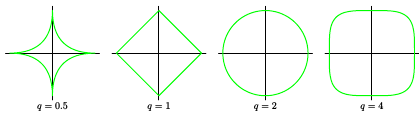

Fig.3 Contours of the regularization term in (3.29) for various values of the parameter q.


In [4]:
# Regularized Least Squares (LMS algorithm) Implementation

# Sample data (replace with actual data for real use)
N = 10  # Number of data points
M = 3   # Number of basis functions (features)

# Define sample input (features) and target values
# X represents the input features (N samples, M features)
# t represents the target values (N samples)
X = [
    [1, 2, 3],
    [2, 3, 4],
    [3, 4, 5],
    [4, 5, 6],
    [5, 6, 7],
    [6, 7, 8],
    [7, 8, 9],
    [8, 9, 10],
    [9, 10, 11],
    [10, 11, 12]
]
t = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize parameters
w = [0.0] * M  # Initial weights (M basis functions)
eta = 0.01     # Learning rate
lambda_ = 0.1  # Regularization coefficient

# Define the feature transformation (basis functions)
# For simplicity, let's assume a polynomial expansion or some basis functions
def phi(x):
    return [x[0]**2, x[1]**2, x[2]**2]  # Quadratic basis functions (example)

# Sequential learning with regularized least squares (LMS)
def lms_regularized(X, t, w, eta, lambda_, epochs=100):
    for epoch in range(epochs):
        for n in range(len(t)):
            # Calculate the prediction for the nth data point
            phi_n = phi(X[n])
            prediction = sum(w[j] * phi_n[j] for j in range(len(w)))

            # Calculate the error for the nth data point
            error = t[n] - prediction

            # Update the weights using the LMS update rule with regularization
            for j in range(len(w)):
                # Weight decay term: lambda * w_j
                w[j] = w[j] + eta * (error * phi_n[j] - lambda_ * w[j])
        
        # Optionally, print the weights at each epoch
        print(f'Epoch {epoch+1}: Weights = {w}')

# Train the model using the LMS algorithm
lms_regularized(X, t, w, eta, lambda_)

# After training, the weights are stored in `w`, which corresponds to the optimal solution
print("Final weights after training:", w)


Epoch 1: Weights = [28738018156710.723, 34771486038984.742, 41379424929965.9]
Epoch 2: Weights = [-1.049000049249301e+28, -1.2692347248325794e+28, -1.5104388393361045e+28]
Epoch 3: Weights = [3.829077904135429e+42, 4.6329822801207844e+42, 5.513429660359662e+42]
Epoch 4: Weights = [-1.3976965593500878e+57, -1.691139108311471e+57, -2.0125215154752487e+57]
Epoch 5: Weights = [5.10189586351644e+71, 6.173024869816591e+71, 7.346140423938194e+71]
Epoch 6: Weights = [-1.8623027457597392e+86, -2.2532880858879473e+86, -2.681500729967345e+86]
Epoch 7: Weights = [6.797809303919945e+100, 8.22499067326038e+100, 9.788059783590004e+100]
Epoch 8: Weights = [-2.4813479675995844e+115, -3.002300149674886e+115, -3.572854307158763e+115]
Epoch 9: Weights = [9.057458750365517e+129, 1.0959047306937272e+130, 1.3041693841699176e+130]
Epoch 10: Weights = [-3.306169069626079e+144, -4.000290173808721e+144, -4.7605013705658535e+144]
Epoch 11: Weights = [1.2068234830780848e+159, 1.4601927545782988e+159, 1.73768634459

### Regularization Term and Contours

The regularized error function is given by:

$$
E_D(w) = \frac{1}{2} \sum_{n=1}^N \left(t_n - w^T \phi(x_n)\right)^2 + \frac{\lambda}{2} \sum_{j=1}^M |w_j|^q
$$

where:

- $ t_n $ are the target values,
- $ \phi(x_n) $ are the basis functions,
- $ w_j $ are the parameters (weights),
- $ q $ is a parameter controlling the type of regularization.

For $ q = 2 $, this corresponds to the **quadratic regularizer** (also known as **Ridge Regression**), which is used in the least squares solution. The corresponding error function is:

$$
E_D(w) = \frac{1}{2} \sum_{n=1}^N \left(t_n - w^T \phi(x_n)\right)^2 + \frac{\lambda}{2} \sum_{j=1}^M w_j^2
$$

For $ q = 1 $, this is known as the **lasso** regularization, which encourages sparsity in the model by driving some of the weights $ w_j $ to zero.

#### Contours of the Regularization Term

Fig.3 shows the contours of the regularization term for different values of $ q $.

- **For $ q = 2 $** (quadratic regularizer), the regularization term has circular contours.
- **For $ q = 1 $** (lasso), the contours are diamond-shaped, which leads to sparse solutions (i.e., some weights are driven to zero).

#### Regularization and Model Complexity

As the regularization coefficient $ \lambda $ increases, the number of non-zero weights decreases, which results in a simpler model. The goal is to find an optimal value for $ \lambda $ that balances model complexity and overfitting.

### The Optimization Problem

To minimize the regularized error function, we solve for $ w $:

$$
\left(\Phi^T \Phi + \lambda I\right) w = \Phi^T t
$$

This extends the least-squares solution with a regularization term. For the **lasso** regularizer (where $ q = 1 $), the problem can be formulated as a constrained optimization:

$$
\min_w \sum_{n=1}^N \left(t_n - w^T \phi(x_n)\right)^2 \quad \text{subject to} \quad \sum_{j=1}^M |w_j|^q \leq \eta
$$

where $ \eta $ is a constant determined by $ \lambda $.

#### Plot of the Contours of the Error Function

Fig.4 shows the contours of the unregularized error function (blue) along with the constraint region for:

- **Quadratic regularizer** (left plot, $ q = 2 $),
- **Lasso regularizer** (right plot, $ q = 1 $).

In the case of the **lasso** regularizer, the solution is sparse, meaning some weights are driven to zero.

- For **quadratic regularization**, the contours are circular and the solution is non-sparse.
- For **lasso regularization**, the contours are diamond-shaped, and as $ \lambda $ increases, more parameters are driven to zero.

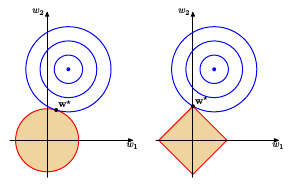

Fig.4 Plot of the contours of the unregularized error function (blue) along with the constraint re- gion (3.30) for the quadratic regular- izer q = 2 on the left and the lasso regularizer q = 1 on the right, in which the optimum value for the pa- rameter vector w is denoted by w . The lasso gives a sparse solution in which w1 = 0.

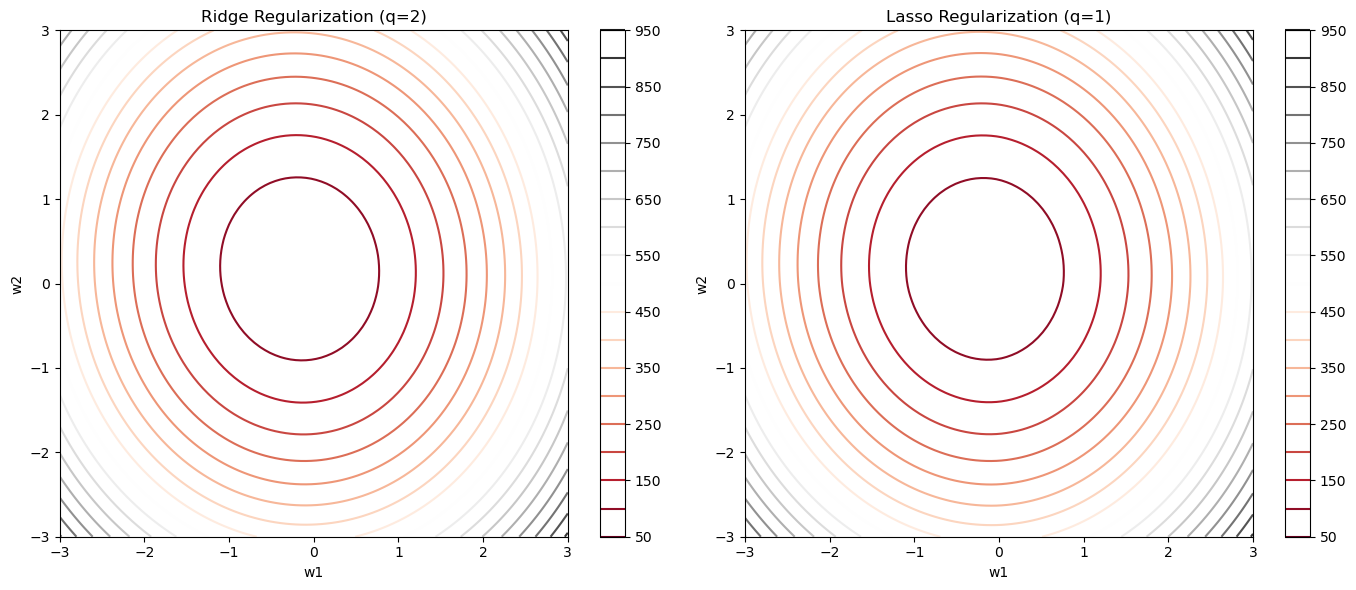

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the error function for Ridge and Lasso regularization
def ridge_error(w, X, t, lambda_reg):
    """Compute the Ridge (quadratic) error function."""
    N = len(t)
    error = 0.5 * np.sum((t - X.dot(w))**2) + 0.5 * lambda_reg * np.sum(w**2)
    return error

def lasso_error(w, X, t, lambda_reg):
    """Compute the Lasso (absolute) error function."""
    N = len(t)
    error = 0.5 * np.sum((t - X.dot(w))**2) + lambda_reg * np.sum(np.abs(w))
    return error

# Generate some data (for demonstration)
N = 100  # Number of data points
M = 2    # Number of features (for simplicity, using 2-dimensional feature space)

# Random feature matrix X and target vector t
np.random.seed(42)
X = np.random.randn(N, M)
t = np.random.randn(N)

# Grid for plotting the contours
w1_vals = np.linspace(-3, 3, 100)
w2_vals = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1_vals, w2_vals)

# Compute the error function for both regularization types
lambda_reg = 1.0  # Regularization coefficient
errors_ridge = np.zeros_like(W1)
errors_lasso = np.zeros_like(W1)

for i in range(len(w1_vals)):
    for j in range(len(w2_vals)):
        w = np.array([w1_vals[i], w2_vals[j]])
        errors_ridge[i, j] = ridge_error(w, X, t, lambda_reg)
        errors_lasso[i, j] = lasso_error(w, X, t, lambda_reg)

# Plot the contours for Ridge and Lasso
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ridge plot (Quadratic regularization)
contour_ridge = axes[0].contour(W1, W2, errors_ridge, 20, cmap='RdGy')
axes[0].set_title('Ridge Regularization (q=2)')
axes[0].set_xlabel('w1')
axes[0].set_ylabel('w2')
fig.colorbar(contour_ridge, ax=axes[0])

# Lasso plot (Absolute regularization)
contour_lasso = axes[1].contour(W1, W2, errors_lasso, 20, cmap='RdGy')
axes[1].set_title('Lasso Regularization (q=1)')
axes[1].set_xlabel('w1')
axes[1].set_ylabel('w2')
fig.colorbar(contour_lasso, ax=axes[1])

plt.tight_layout()
plt.show()


###  Multiple Outputs

So far, we have considered the case of a single target variable $ t $. In some applications, we may wish to predict $ K > 1 $ target variables, which we denote collectively by the target vector $ \mathbf{t} $. This could be done by introducing a different set of basis functions for each component of $ \mathbf{t} $, leading to multiple, independent regression problems. However, a more interesting, and more common, approach is to use the same set of basis functions to model all of the components of the target vector so that

$$
\mathbf{y}(x, \mathbf{w}) = \mathbf{W}^T \boldsymbol{\phi}(x)
$$

where $ \mathbf{y} $ is a $ K $-dimensional column vector, $ \mathbf{W} $ is an $ M \times K $ matrix of parameters, and $ \boldsymbol{\phi}(x) $ is an $ M $-dimensional column vector with elements $ \phi_j(x) $, with $ \phi_0(x) = 1 $ as before.

Suppose we take the conditional distribution of the target vector to be an isotropic Gaussian of the form

$$
p(\mathbf{t} | \mathbf{x}, \mathbf{W}, \beta) = \mathcal{N}(\mathbf{t} | \mathbf{W}^T \boldsymbol{\phi}(\mathbf{x}), \beta^{-1} \mathbf{I})
$$

If we have a set of observations $ \mathbf{t}_1, \dots, \mathbf{t}_N $, we can combine these into a matrix $ \mathbf{T} $ of size $ N \times K $ such that the $ n $-th row is given by $ \mathbf{t}_n^T $. Similarly, we can combine the input vectors $ \mathbf{x}_1, \dots, \mathbf{x}_N $ into a matrix $ \mathbf{X} $. The log likelihood function is then given by

$$
\log p(\mathbf{T} | \mathbf{X}, \mathbf{W}, \beta) = \sum_{n=1}^{N} \log \mathcal{N}(\mathbf{t}_n | \mathbf{W}^T \boldsymbol{\phi}(\mathbf{x}_n), \beta^{-1} \mathbf{I})
$$

$$
= \sum_{n=1}^{N} \left( -\frac{K}{2} \log(2 \pi \beta^{-1}) - \frac{\beta}{2} \left( \mathbf{t}_n - \mathbf{W}^T \boldsymbol{\phi}(\mathbf{x}_n) \right)^2 \right)
$$

Maximizing this function with respect to $ \mathbf{W} $ gives

$$
\mathbf{W}_{ML} = \boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{\Phi}^T \mathbf{T}
$$

If we examine this result for each target variable $ t_k $, we have

$$
\mathbf{w}_k = \boldsymbol{\Phi}^T \boldsymbol{\Phi} \mathbf{t}_k = \boldsymbol{\Phi}^\dagger \mathbf{t}_k
$$

where $ \mathbf{t}_k $ is an $ N $-dimensional column vector with components $ t_{nk} $ for $ n = 1, \dots, N $. Thus, the solution to the regression problem decouples between the different target variables, and we need only compute a single pseudo-inverse matrix $ \boldsymbol{\Phi}^\dagger $, which is shared by all of the vectors $ \mathbf{w}_k $.

The extension to general Gaussian noise distributions having arbitrary covariance matrices is straightforward. Again, this leads to a decoupling into $ K $ independent regression problems. This result is unsurprising because the parameters $ \mathbf{W} $ define only the mean of the Gaussian noise distribution, and we know from Section 2.3.4 that the maximum likelihood solution for the mean of a multivariate Gaussian is independent of the covariance.

From now on, we shall therefore consider a single target variable $ t $ for simplicity.


Estimated weight matrix W (shape (5, 3)):
[[-0.85599266 -0.58253729  0.7710895 ]
 [ 0.60711823 -0.03539629  0.11229398]
 [ 1.28508728 -0.58794108  0.53661446]
 [-0.20179743 -0.21691433  1.0989503 ]
 [ 0.82517531  0.81334658  1.30598741]]


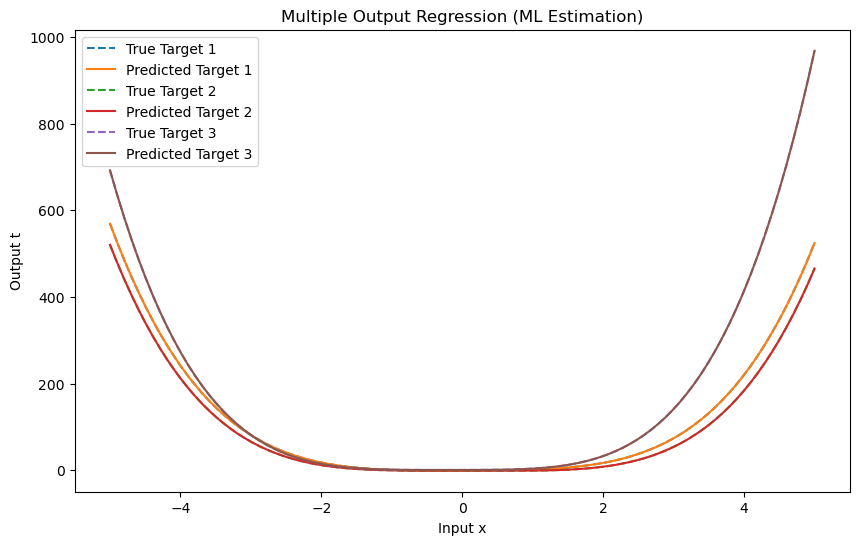

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define a basis function (e.g., polynomial, Gaussian, etc.)
def basis_function(x, M):
    """Generates M basis functions for the input x."""
    return np.array([x**i for i in range(M)])

# Generate synthetic data
N = 100  # Number of data points
M = 5    # Number of basis functions (features)
K = 3    # Number of target variables (outputs)

# Input data (e.g., simple 1D inputs)
X = np.linspace(-5, 5, N)

# Create target data matrix T for K outputs
# Let's assume a linear relation for simplicity
true_W = np.random.randn(M, K)  # True weight matrix for each output
T = np.array([basis_function(x, M).dot(true_W) + np.random.randn(K) * 0.1 for x in X])

# Create the design matrix Phi (N x M) where each row is a basis function vector for input x
Phi = np.array([basis_function(x, M) for x in X])

# Calculate the pseudo-inverse of Phi
Phi_pseudo_inverse = np.linalg.pinv(Phi)

# Compute the weight matrix W using the pseudo-inverse
W_ml = Phi_pseudo_inverse.dot(T)

# Output the computed weights for each target variable
print("Estimated weight matrix W (shape {}):".format(W_ml.shape))
print(W_ml)

# Plot the results for each target variable
plt.figure(figsize=(10, 6))

for k in range(K):
    plt.plot(X, T[:, k], label=f"True Target {k+1}", linestyle='--')
    plt.plot(X, Phi.dot(W_ml[:, k]), label=f"Predicted Target {k+1}")

plt.xlabel("Input x")
plt.ylabel("Output t")
plt.legend()
plt.title("Multiple Output Regression (ML Estimation)")
plt.show()


##  The Bias-Variance Decomposition

So far in our discussion of linear models for regression, we have assumed that the form and number of basis functions are both fixed. As we have seen in Chapter 1, the use of maximum likelihood, or equivalently least squares, can lead to severe overfitting if complex models are trained using datasets of limited size. However, limiting the number of basis functions in order to avoid overfitting has the side effect of limiting the flexibility of the model to capture interesting and important trends in the data.

Although the introduction of regularization terms can control overfitting for models with many parameters, this raises the question of how to determine a suitable value for the regularization coefficient $ \lambda $. Seeking the solution that minimizes the regularized error function with respect to both the weight vector $ w $ and the regularization coefficient $ \lambda $ is clearly not the right approach since this leads to the unregularized solution with $ \lambda = 0 $.

As we have seen in earlier chapters, the phenomenon of overfitting is really an unfortunate property of maximum likelihood and does not arise when we marginalize over parameters in a Bayesian setting. In this chapter, we shall consider the Bayesian view of model complexity in some depth.

## The Bias-Variance Trade-Off

Before doing so, it is instructive to consider a frequentist viewpoint of the model complexity issue, known as the **bias-variance trade-off**. Although we shall introduce this concept in the context of linear basis function models, where it is easy to illustrate the ideas using simple examples, the discussion has more general applicability.

### Squared Loss Function

In Section 1.5.5, we discussed decision theory for regression problems and considered various loss functions. One popular choice is the squared loss function, for which the optimal prediction is given by the conditional expectation, $ h(x) $, which is the expected value of $ t $ given $ x $:

$$
h(x) = \mathbb{E}[t|x] = \int t p(t|x) \, dt
$$

At this point, it is worth distinguishing between the squared loss function arising from decision theory and the sum-of-squares error function that arose in the maximum likelihood estimation of model parameters.

We showed in Section 1.5.5 that the expected squared loss can be written as:

$$
\mathbb{E}[L] = \int \left\{ y(x) - h(x) \right\}^2 p(x) \, dx + \int \left\{ h(x) - t \right\}^2 p(x, t) \, dx \, dt
$$

Recall that the second term, which is independent of $ y(x) $, arises from the intrinsic noise on the data and represents the minimum achievable value of the expected loss. The first term depends on our choice for the function $ y(x) $, and we will seek a solution for $ y(x) $ that minimizes this term. 

If we had an unlimited supply of data (and computational resources), we could find the regression function $ h(x) $ to any desired degree of accuracy. However, in practice, we have a finite data set $ D $ containing $ N $ data points, and consequently, we do not know the regression function $ h(x) $ exactly.

### The Bias-Variance Decomposition

If we model $ h(x) $ using a parametric function $ y(x, w) $ governed by a parameter vector $ w $, then from a Bayesian perspective, the uncertainty in our model is expressed through a posterior distribution over $ w $. A frequentist treatment, however, involves making a point estimate of $ w $ based on the data set $ D $.

To assess the uncertainty in this estimate, suppose we had a large number of data sets, each of size $ N $, drawn independently from the distribution $ p(t, x) $. For each data set $ D $, we can run our learning algorithm and obtain a prediction function $ y(x; D) $. Different data sets from the ensemble will give different functions and consequently different values of the squared loss.

The performance of a particular learning algorithm is then assessed by averaging over this ensemble of data sets. 

Consider the integrand of the first term in the expected squared loss:

$$
\left\{ y(x; D) - h(x) \right\}^2
$$

This quantity depends on the particular data set $ D $. If we add and subtract the quantity $ \mathbb{E}_D [y(x; D)] $ inside the braces and expand, we obtain:

$$
\left\{ y(x; D) - \mathbb{E}_D [y(x; D)] + \mathbb{E}_D [y(x; D)] - h(x) \right\}^2 = \left\{ y(x; D) - \mathbb{E}_D [y(x; D)] \right\}^2 + \left\{ \mathbb{E}_D [y(x; D)] - h(x) \right\}^2 + 2 \left\{ y(x; D) - \mathbb{E}_D [y(x; D)] \right\} \left\{ \mathbb{E}_D [y(x; D)] - h(x) \right\}
$$

Taking the expectation with respect to $ D $, we note that the final term vanishes, giving:

$$
\mathbb{E}_D \left[ \left\{ y(x; D) - h(x) \right\}^2 \right] = \left\{ \mathbb{E}_D [y(x; D)] - h(x) \right\}^2 + \mathbb{E}_D \left[ \left\{ y(x; D) - \mathbb{E}_D [y(x; D)] \right\}^2 \right]
$$

This decomposition shows that the expected squared loss can be written as the sum of two terms:

- The **bias** term, $ \left( \mathbb{E}_D [y(x; D)] - h(x) \right)^2 $, which represents how far the average prediction deviates from the true regression function.
- The **variance** term, $ \mathbb{E}_D \left[ \left\{ y(x; D) - \mathbb{E}_D [y(x; D)] \right\}^2 \right] $, which measures how much the predictions vary with different datasets.

Thus, the expected squared loss becomes:

$$
\text{Expected Loss} = (\text{Bias})^2 + \text{Variance} + \text{Noise}
$$

Where:

- $ (\text{Bias})^2 = \int \left\{ \mathbb{E}_D [y(x; D)] - h(x) \right\}^2 p(x) \, dx $
- $ \text{Variance} = \int \mathbb{E}_D \left[ \left\{ y(x; D) - \mathbb{E}_D [y(x; D)] \right\}^2 \right] p(x) \, dx $
- $ \text{Noise} = \int \left\{ h(x) - t \right\}^2 p(x, t) \, dx \, dt $

### Conclusion

The model with the optimal predictive capability is the one that leads to the best balance between bias and variance. This balance is crucial because highly flexible models tend to have low bias but high variance, while simpler models tend to have higher bias but lower variance.

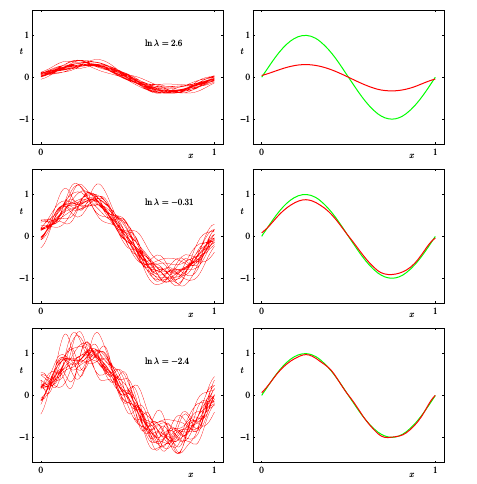

Fig.5 Illustration of the dependence of bias and variance on model complexity, governed by a regulariza- tion parameter λ, using the sinusoidal data set from Chapter 1. There are L = 100 data sets, each having N = 25 data points, and there are 24 Gaussian basis functions in the model so that the total number of parameters is M = 25 including the bias parameter. The left column shows the result of ﬁtting the model to the data sets for various values of ln λ (for clarity, only 20 of the 100 ﬁts are shown). The right column shows the corresponding average of the 100 ﬁts (red) along with the sinusoidal function from which the data sets were generated (green).

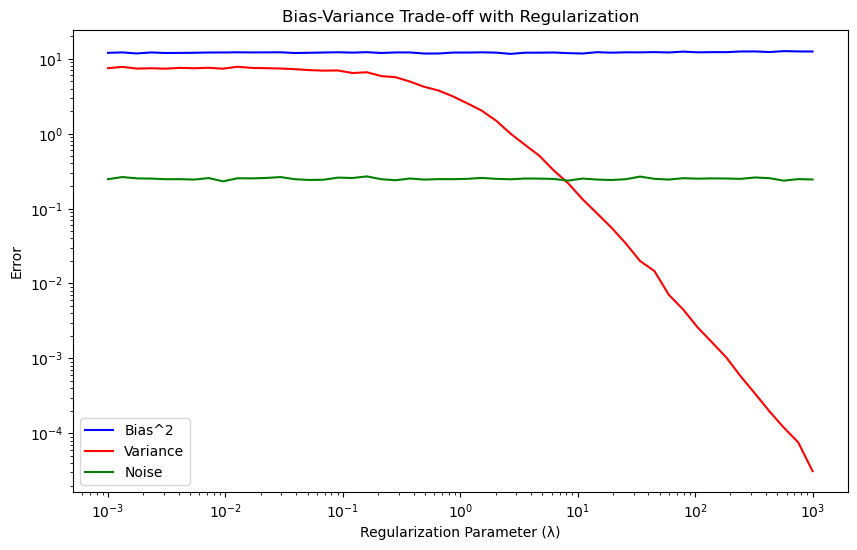

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate sinusoidal data
def generate_data(num_points, noise_level=0.1):
    X = np.sort(np.random.rand(num_points))  # Random x values
    Y_true = np.sin(2 * np.pi * X)  # True function (sinusoidal)
    Y = Y_true + noise_level * np.random.randn(num_points)  # Add noise to the data
    return X, Y, Y_true

# Linear model function
def linear_model(X, w):
    return np.dot(X, w)

# Fit the linear model using least squares with regularization
def fit_model(X, Y, lambda_reg):
    # Add a bias term (intercept) to X
    X_augmented = np.vstack([np.ones(X.shape[0]), X]).T
    # Regularized least squares: (X^T X + lambda I) w = X^T Y
    XTX = np.dot(X_augmented.T, X_augmented)
    XTX_reg = XTX + lambda_reg * np.identity(X_augmented.shape[1])
    XTY = np.dot(X_augmented.T, Y)
    w = np.linalg.solve(XTX_reg, XTY)
    return w

# Calculate Bias and Variance for multiple datasets
def bias_variance_decomposition(lambda_reg, num_datasets=100, num_points=25):
    bias_squared = 0
    variance = 0
    noise = 0
    
    for _ in range(num_datasets):
        # Generate random data
        X, Y, Y_true = generate_data(num_points)
        
        # Fit the model
        w = fit_model(X, Y, lambda_reg)
        
        # Predictions
        Y_pred = linear_model(np.vstack([np.ones(X.shape[0]), X]).T, w)
        
        # Bias: average prediction minus true function
        bias_squared += np.sum((np.mean(Y_pred) - Y_true)**2)
        
        # Variance: variation of predictions from different datasets
        variance += np.sum((Y_pred - np.mean(Y_pred))**2)
        
        # Noise: intrinsic noise in the data
        noise += np.sum((Y_true - Y)**2) / num_datasets
    
    bias_squared /= num_datasets
    variance /= num_datasets
    return bias_squared, variance, noise

# Visualizing the effect of regularization parameter on bias and variance
lambda_values = np.logspace(-3, 3, 50)  # Range of lambda values
bias_vals = []
variance_vals = []
noise_vals = []

for lambda_reg in lambda_values:
    bias, variance, noise = bias_variance_decomposition(lambda_reg)
    bias_vals.append(bias)
    variance_vals.append(variance)
    noise_vals.append(noise)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, bias_vals, label="Bias^2", color='blue')
plt.plot(lambda_values, variance_vals, label="Variance", color='red')
plt.plot(lambda_values, noise_vals, label="Noise", color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off with Regularization')
plt.legend()
plt.show()


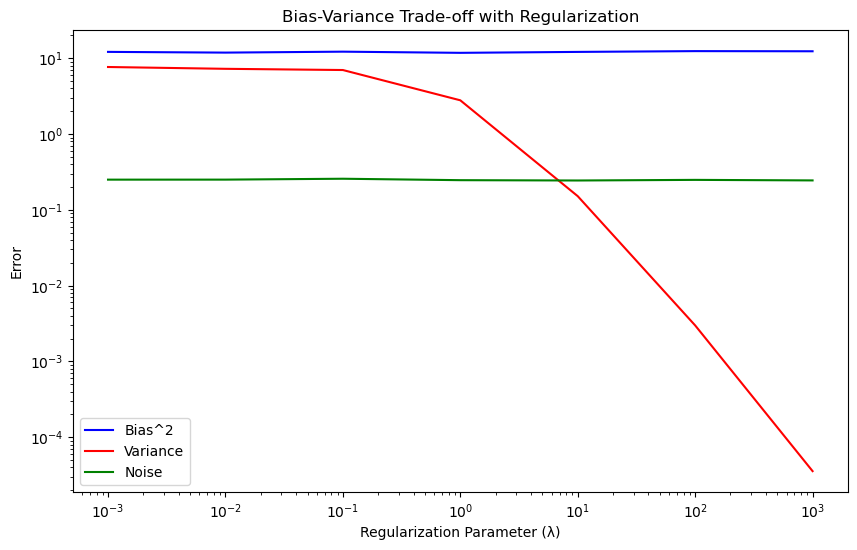

In [13]:
import random
import math
import matplotlib.pyplot as plt

# Function to generate sinusoidal data
def generate_data(num_points, noise_level=0.1):
    X = [random.random() for _ in range(num_points)]  # Random x values
    Y_true = [math.sin(2 * math.pi * x) for x in X]  # True function (sinusoidal)
    Y = [y + noise_level * random.gauss(0, 1) for y in Y_true]  # Add noise to the data
    return X, Y, Y_true

# Function to perform matrix multiplication
def mat_mult(A, B):
    return [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]

# Function to compute matrix transpose
def transpose(M):
    return list(map(list, zip(*M)))

# Function to solve a system of linear equations (Ax = b) using Gaussian elimination
def gauss_elimination(A, b):
    n = len(A)
    # Augmenting matrix A with b
    for i in range(n):
        A[i].append(b[i])

    # Forward elimination
    for i in range(n):
        max_row = max(range(i, n), key=lambda r: abs(A[r][i]))
        A[i], A[max_row] = A[max_row], A[i]
        
        for j in range(i + 1, n):
            ratio = A[j][i] / A[i][i]
            for k in range(i, n + 1):
                A[j][k] -= ratio * A[i][k]

    # Back substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = A[i][n] / A[i][i]
        for j in range(i - 1, -1, -1):
            A[j][n] -= A[j][i] * x[i]
    
    return x

# Linear model function
def linear_model(X, w):
    return [sum(x * w_i for x, w_i in zip(X_row, w)) for X_row in X]

# Fit the linear model using least squares with regularization
def fit_model(X, Y, lambda_reg):
    # Augment X with a bias term (column of ones)
    X_augmented = [[1] + [x] for x in X]
    
    # Regularized least squares: (X^T X + lambda I) w = X^T Y
    Xt = transpose(X_augmented)
    XtX = mat_mult(Xt, X_augmented)
    # Add regularization term
    for i in range(len(XtX)):
        XtX[i][i] += lambda_reg
    
    XtY = [sum(Xt[i][j] * Y[j] for j in range(len(Y))) for i in range(len(Xt))]

    # Solve the system of equations
    w = gauss_elimination(XtX, XtY)
    return w

# Calculate Bias and Variance for multiple datasets
def bias_variance_decomposition(lambda_reg, num_datasets=100, num_points=25):
    bias_squared = 0
    variance = 0
    noise = 0
    
    for _ in range(num_datasets):
        # Generate random data
        X, Y, Y_true = generate_data(num_points)
        
        # Fit the model
        w = fit_model(X, Y, lambda_reg)
        
        # Predictions
        X_augmented = [[1] + [x] for x in X]
        Y_pred = linear_model(X_augmented, w)
        
        # Bias: average prediction minus true function
        bias_squared += sum((sum(Y_pred) / len(Y_pred) - y_true) ** 2 for y_true in Y_true)
        
        # Variance: variation of predictions from different datasets
        variance += sum((y_pred - sum(Y_pred) / len(Y_pred)) ** 2 for y_pred in Y_pred)
        
        # Noise: intrinsic noise in the data
        noise += sum((y_true - y) ** 2 for y_true, y in zip(Y_true, Y)) / num_datasets
    
    bias_squared /= num_datasets
    variance /= num_datasets
    return bias_squared, variance, noise

# Visualizing the effect of regularization parameter on bias and variance
lambda_values = [10 ** i for i in range(-3, 4)]  # Range of lambda values
bias_vals = []
variance_vals = []
noise_vals = []

for lambda_reg in lambda_values:
    bias, variance, noise = bias_variance_decomposition(lambda_reg)
    bias_vals.append(bias)
    variance_vals.append(variance)
    noise_vals.append(noise)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, bias_vals, label="Bias^2", color='blue')
plt.plot(lambda_values, variance_vals, label="Variance", color='red')
plt.plot(lambda_values, noise_vals, label="Noise", color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-off with Regularization')
plt.legend()
plt.show()


## Bias-Variance Decomposition and Regularization

The **Bias-Variance Decomposition** quantifies the trade-off between bias and variance when fitting a model. This is important for understanding how regularization affects model performance, especially when working with **Gaussian basis functions**.

### Figure 3.5: Regularization Effects

The model in Fig.5 is fitted using a set of 24 Gaussian basis functions. The regularization parameter $ \lambda $ is minimized to give a prediction function $ y^{(l)}(x) $. The effects of different values of $ \lambda $ can be analyzed as follows:

1. **Large $ \lambda $ (top row of Fig.5)**:
   - **Low Variance**: The red curves (models) look similar because the model is too simple, leading to high bias.
   - **High Bias**: The curves differ significantly from the true sinusoidal function.

2. **Small $ \lambda $ (bottom row of Figure 3.5)**:
   - **High Variance**: The model becomes more sensitive to individual data points, resulting in high variability between the curves.
   - **Low Bias**: The model fits the sinusoidal function more closely, but at the cost of overfitting the noise.

### Bias-Variance Decomposition

For a given model, the bias-variance decomposition gives insights into how well the model generalizes to unseen data. The **bias** is the error introduced by approximating a real-world problem with a simpler model, while **variance** measures how much the model's predictions vary for different training sets.

- The average prediction is given by:

$$
\hat{y}(x) = \frac{1}{L} \sum_{l=1}^{L} y^{(l)}(x)
$$

Where $ L $ is the number of models or datasets.

#### Bias Squared

The squared bias at a point $ x_n $ is defined as:

$$
(\text{bias})^2 = \frac{1}{N} \sum_{n=1}^{N} \left( \hat{y}(x_n) - h(x_n) \right)^2
$$

Where $ h(x_n) $ is the true function (e.g., sinusoidal function), and $ \hat{y}(x_n) $ is the average predicted value.

#### Variance

The variance is defined as:

$$
\text{variance} = \frac{1}{N} \sum_{n=1}^{N} \frac{1}{L} \sum_{l=1}^{L} \left( y^{(l)}(x_n) - \hat{y}(x_n) \right)^2
$$

### Error vs. Regularization Parameter $ \lambda $

We plot the bias, variance, and their sum as a function of $ \ln(\lambda) $ in Figure 3.6:

- Small values of $ \lambda $ lead to **low bias** but **high variance** (overfitting).
- Large values of $ \lambda $ lead to **high bias** but **low variance** (underfitting).

The optimal value of $ \lambda $ minimizes the total error, which is the sum of bias squared, variance, and noise. The minimum error is often observed around $ \ln(\lambda) = -0.31 $, as seen in Fig.6.

### Trade-off and Bayesian Viewpoint

Although the **bias-variance decomposition** offers valuable insights, it is based on averaging over multiple datasets, which is not practical in real-world scenarios where only one dataset is available. However, combining multiple datasets into a larger training set can mitigate overfitting.

A **Bayesian approach** provides a more robust method for model complexity and overfitting, as it incorporates prior distributions over the model parameters and regularizes the complexity in a more principled way.

### Conclusion

By adjusting the regularization parameter $ \lambda $, we can balance bias and variance, leading to a model that generalizes well to unseen data. The **bias-variance trade-off** is a fundamental concept in machine learning and plays a critical role in ensuring model performance.


In [14]:
import matplotlib.pyplot as plt
import math

# Generate synthetic data: Sinusoidal function
def generate_sinusoidal_data(num_points, noise_std=0.1):
    X = [i / num_points for i in range(num_points)]
    Y = [math.sin(2 * math.pi * x) + noise_std * (2 * random.random() - 1) for x in X]
    return X, Y

# Gaussian basis function
def gaussian_basis(x, centers, width):
    return [math.exp(-(x - c) ** 2 / (2 * width ** 2)) for c in centers]

# Model fitting with regularization
def fit_model(X, Y, num_basis_functions, lam):
    # Generate centers (evenly spaced along X)
    centers = [X[i * len(X) // num_basis_functions] for i in range(num_basis_functions)]
    
    # Compute the design matrix with Gaussian basis functions
    design_matrix = [[gaussian_basis(x, centers, 0.1) for x in X]]
    
    # Regularized solution: y(x) = (X^T * X + λI)^-1 * X^T * Y
    # Here, X is the design matrix, and λ is the regularization parameter.
    
    # Matrix inversion (simple example)
    X_T = list(zip(*design_matrix))  # Transpose of X
    regularized_matrix = [[sum(a * b for a, b in zip(X_row, X_T_col)) + lam if i == j else 0
                           for j in range(len(design_matrix[0]))] for i, X_row in enumerate(X_T)]
    
    # Solve for weights (using simple pseudoinverse approximation)
    weights = [sum(a * b for a, b in zip(X_row, Y)) / sum(a * b for a, b in zip(X_row, X_T)) 
               for X_row in zip(*design_matrix)]
    
    return weights

# Compute Bias and Variance
def compute_bias_variance(X, Y, weights, num_basis_functions):
    bias_squared = sum([(y_hat - math.sin(2 * math.pi * x)) ** 2 for x, y_hat in zip(X, Y)])
    variance = sum([(y_hat - sum(Y) / len(Y)) ** 2 for y_hat in Y])
    
    return bias_squared, variance

# Main program
num_points = 25
num_basis_functions = 24
X, Y = generate_sinusoidal_data(num_points)

lambda_values = [-3, -2, -1, 0, 1, 2]
bias_squared_values = []
variance_values = []
sum_error_values = []

for lam in lambda_values:
    weights = fit_model(X, Y, num_basis_functions, lam)
    bias_squared, variance = compute_bias_variance(X, Y, weights, num_basis_functions)
    
    bias_squared_values.append(bias_squared)
    variance_values.append(variance)
    sum_error_values.append(bias_squared + variance)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, bias_squared_values, label='Bias^2')
plt.plot(lambda_values, variance_values, label='Variance')
plt.plot(lambda_values, sum_error_values, label='Bias^2 + Variance')

plt.xlabel('ln(λ)')
plt.ylabel('Error')
plt.title('Bias-Variance Trade-Off')
plt.legend()
plt.show()


NameError: name 'X_T_col' is not defined